# Calculate optimal 2 by 2 with 45 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.utils import get_input_count, calculate_beam_lengths
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
cell_size = [2, 2]
original_angles = [0, 45, 135, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
print(calculate_beam_lengths(cell_size, original_angles))

([1.0, 1.4142135623730951], [0, 45.00000000000001, 135.0, 180])


prefill replay memory
start training
 new max record arrange grid:  1.6025
 new max record arrange grid:  2.045
 new max record arrange grid:  2.1475
 new max record arrange grid:  2.25
 new max record arrange grid:  2.3075
   10 mean training reward:  1.96
 new max record arrange grid:  2.41
 new max record arrange grid:  2.5
   20 mean training reward:  1.90
   30 mean training reward:  1.94
   40 mean training reward:  1.81
   50 mean training reward:  1.95
   60 mean training reward:  2.15
   70 mean training reward:  2.01
   80 mean training reward:  2.13
   90 mean training reward:  1.91
  100 mean training reward:  2.04
  110 mean training reward:  2.20
  120 mean training reward:  2.07
  130 mean training reward:  2.11
  140 mean training reward:  2.01
  150 mean training reward:  2.22
  160 mean training reward:  2.01
  170 mean training reward:  2.11
  180 mean training reward:  2.23
  190 mean training reward:  2.16
  200 mean training reward:  2.26
  210 mean training rewar

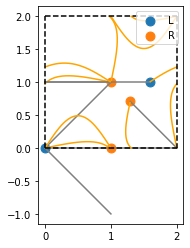

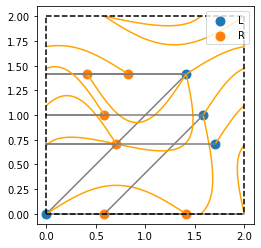

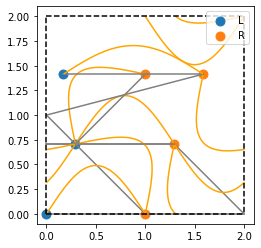

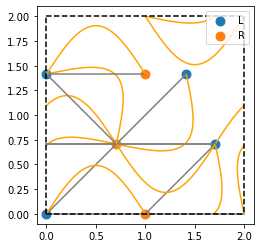

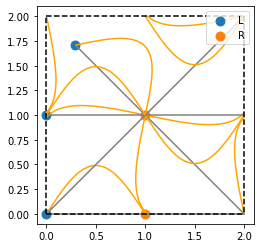

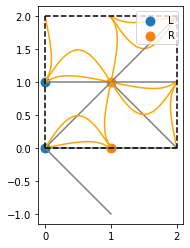

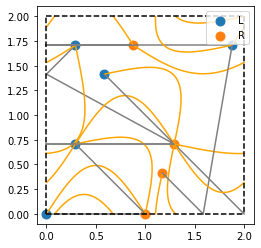

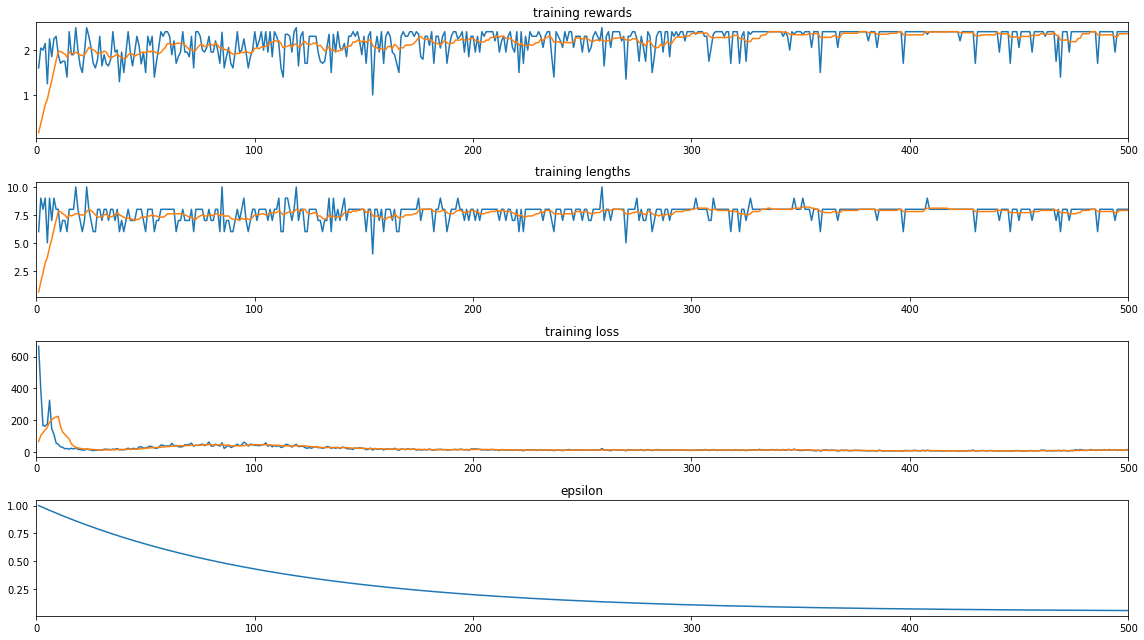

[1.6025, 1.6025, 2.045, 2.045, 2.1475, 2.1475, 2.25, 2.25, 2.3075, 2.3075, 2.41, 2.41, 2.5, 2.5]
[1, 2, 2, 4, 4, 6, 6, 9, 9, 15, 15, 18, 18, 500]


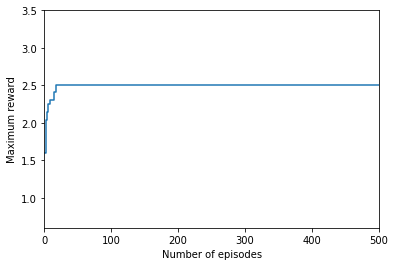

In [3]:
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=10, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

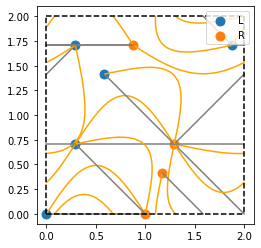

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [5]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [6]:
max(agent.rewards)

2.5

In [7]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)